# Finding Alison's Trial Part 2

### Logistic Regression for Binary Classification

We'll import ‘tensorflow’ for implementing the Machine Learning algorithm. We'll also import ‘numpy’ and ‘pandas’ library to handle the ‘Rosewood_forest_dataset.csv’ file. These libraries provide functions to make vector operations and manipulations extremely easy and are of common occurrence in Data Science. ‘matplotlib’ is another library, which we'll import, for plotting graphs.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Press ‘Shift + Enter’ to execute the codes in the cell. 

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Data set of time period after which people, who entered the forest, went missing is given in 'Rosewood_forest_dataset.csv'file.

In [2]:
raw_data = pd.read_csv('Rosewood_forest_dataset.csv')

Type ‘raw_data’ in a cell and execute it to display the data in a well-formatted table (called DataFrame in Pandas.) In Notebook, we can find the contents of any variable by just typing its name and executing it in a cell.

In [3]:
raw_data

,Time_hrs,Missing
0,27.985656,1.0
1,12.937344,0.0
2,9.318436,0.0
3,2.941449,0.0
4,15.180353,0.0
5,18.387134,1.0
6,45.325011,1.0
7,50.029004,1.0
8,35.155362,1.0
9,5.543258,0.0


In this table, '1' indicates that the person is missing and '0' denotes he/she had  returned successfully from the forest.

We'll separate the 'Time_hrs' and 'Missing' columns.

In [4]:
time = raw_data['Time_hrs']
missing = raw_data['Missing']

And plot them in a graph as a Scatter plot.

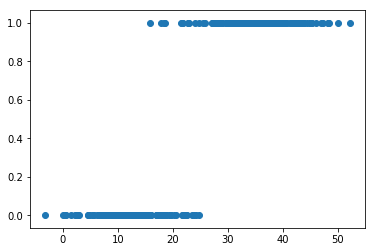

In [5]:
%matplotlib inline 
#this allows the plot to be displayed within the notebook

plt.scatter(time, missing)

As one can see, we are not sure what is the exact threshold after which the person is missing. We'll find the same using our algorithm.

### My Algorithm

1. Assign initial value as [0., 0.] to the variable, 'w'.
2. Frame the equation: y = 1/(1 + exp(- (w[1] . X + w[0]))) = sigmoid(w[1] . X + w[0])
3. Train the model to find the true value of ‘w[0]’ and ‘w[1]’ over several iterations using values of 'time' and 'missing' and make sure that the error is reduced at each step.
4. Use this predicted value of ‘w[0]’ and ‘w[1]’ to find the boundary of missing time.

X_input and Y_output are the input and output placeholders respectively.

In [6]:
X_input = tf.placeholder("float")
Y_output = tf.placeholder("float")

w is the weights for sigmoid function

In [7]:
w = tf.Variable([0.,0.])

Frame the equation: y = 1/(1 + exp(- (w[1] . X_input + w[0]))) = sigmoid(w[1] . X_input + w[0])

In [8]:
y_model = tf.sigmoid(w[1] * X_input + w[0])

To calculate the error between the calculated y_model and true y values, we'll compute the following cost or error function. 

Note: For Sigmoid functions, the error is calculated using the formula given below.

In [9]:
cost = tf.reduce_mean(-Y_output * tf.log(y_model) - (1 - Y_output) * tf.log(1 - y_model))

TensorFlow provides a function called ‘Gradient Descent Optimizer’ which tries to reduce the error or minimize the value of cost function during training. ‘learning_rate’ is the rate at which error is to be minimized. Using high ‘learning_rate’ can cause the error to fluctuate while using a lower value can slow down the process. So, I'd recommended to use 0.01.

In [10]:
train_op = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

Though the values of variables ‘w’ are indicated as [0,0] while declaring them, they aren’t initialized yet. So, the function ‘tf.global_variables_initializer()’ is used to initialize the values of all the variables created so far.

In [11]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

We can train the model 20000 times to get a better accuracy, where training_epochs is the number of training iterations.

In [12]:
training_epochs = 20000

In each iteration, we can execute the object ‘train_op’ using sess.run() function. Inputs 'time' and 'missing' are assigned to the placeholders X_input and Y_output while executing the ‘train_op’ object.

In [13]:
for epoch in range(training_epochs):
    sess.run(train_op, feed_dict = {X_input : time, Y_output : missing})

Recover the predicted value of ‘w' 

In [14]:
w_val = sess.run(w)

In [15]:
time_plot = np.linspace(0, 60, 100)
predicted_val = sess.run(tf.sigmoid(time_plot * w_val[1] + w_val[0]))

Calculate the sigmoid curve for predicted values of w[0] and w[1] and plot the same in a graph.

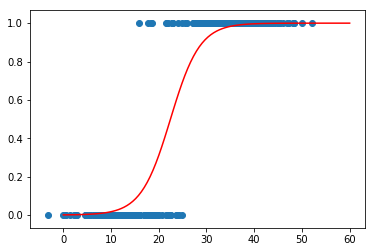

In [16]:
plt.plot(time_plot, predicted_val,'r')
plt.scatter(time, missing)

The machine had learnt to create a sigmoid curve from a set of labeled inputs (hence, supervised learning.) Values of Sigmoid function greater than or equal to 0.5 are classified as '1' and lesser than 0.5 as '0'. Since, binary labels are used (1 or 0, A or B, cat or dog, etc.) with Sigmoid function, this type is called as Binary Classification.

From the curve, 0.5 of Sigmoid curve is close to 22.5 hours. So, we'll check whether the value of the sigmoid function is < 0.5 or >= 0.5 for the time period = 22 hours. 

In [17]:
now_time = 22
if sess.run(tf.sigmoid(now_time * w_val[1] + w_val[0])) < 0.5:
    missing_or_not = 0
else:
    missing_or_not = 1

In [18]:
missing_or_not

0

We'll check whether the value of the sigmoid function is < 0.5 or >= 0.5 for the time period = 23 hours. 

In [19]:
now_time = 23
if sess.run(tf.sigmoid(now_time * w_val[1] + w_val[0])) < 0.5:
    missing_or_not = 0
else:
    missing_or_not = 1
sess.close()

In [20]:
missing_or_not

1

Apparently, at 22 hours a person is less probable to be missing. So, we need not worry. Alison had been lost for only 18 hours. The Inspector will definitely find her using the trial I have predicted.

## ALISON IS SAFE UPTO 22 hours